In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings # Supress warnings 
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv("c:/Users/OmerCelik/Desktop/staj/economics.csv")

In [3]:
df.tail(48)

,Unnamed: 0,date,pce,pop,psavert,uempmed,unemploy
526,527,2011-05-01,10612.0,311607.080,6.9,21.6,13855
527,528,2011-06-01,10636.8,311791.223,7.2,22.4,13962
528,529,2011-07-01,10677.5,311997.049,7.3,22.0,13763
529,530,2011-08-01,10700.6,312205.367,7.2,22.4,13818
530,531,2011-09-01,10738.1,312429.118,6.8,22.0,13948
531,532,2011-10-01,10753.1,312644.159,6.8,20.6,13594
532,533,2011-11-01,10759.5,312829.523,7.0,20.8,13302
533,534,2011-12-01,10772.2,313009.712,7.8,20.5,13093
534,535,2012-01-01,10862.1,313183.179,8.0,20.8,12797
535,536,2012-02-01,10953.5,313338.977,8.0,19.7,12813


In [4]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['pce'].values)
result

(4.901561672061076,
 1.0,
 4,
 569,
 {'1%': -3.4418948967017475,
  '5%': -2.8666329082535222,
  '10%': -2.569482366838501},
 5143.60385836625)

In [5]:
ts_diff = np.diff(df['pce'])
df['pce_diff_1'] = np.append([0], ts_diff)

In [6]:
result_after = adfuller(df['pce_diff_1'].values)
result_after

(-4.061436381414329,
 0.0011208652166403424,
 9,
 564,
 {'1%': -3.4419977165341673,
  '5%': -2.866678179017994,
  '10%': -2.5695064902419396},
 5155.6425842130475)

In [7]:
train_size = len(df)-48
test_size = 48

univariate_df = df[['date', 'pce']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))

526 48


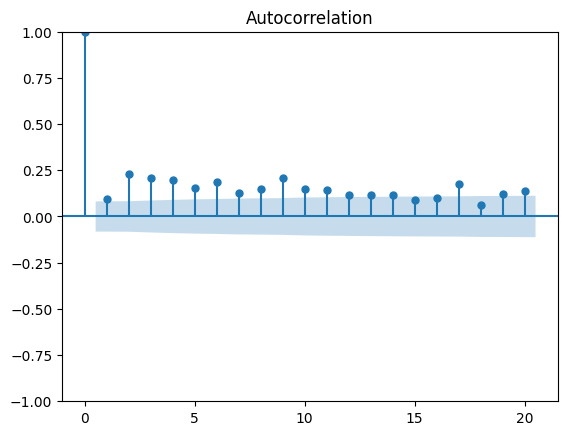

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df["pce_diff_1"], lags=20)
plt.show()

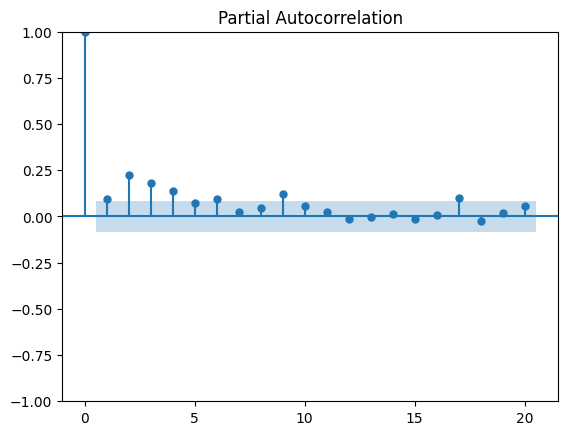

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df["pce_diff_1"], lags=20)
plt.show()

In [10]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from colorama import Fore

model = ARIMA(y_train, order=(2,1,2))
model_fit = model.fit()

# Prediction with ARIMA
y_pred= model_fit.forecast(48)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))

print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

RMSE: 136.47782999372635


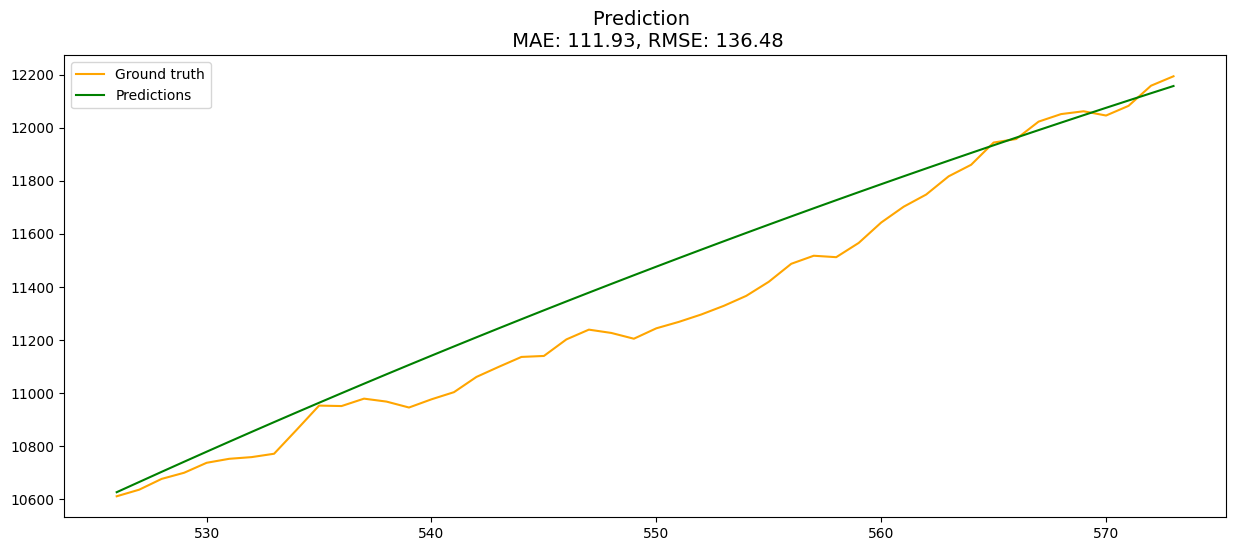

In [11]:
plt.figure(figsize=(15, 6))
plt.plot(y_valid.index, y_valid['y'], label='Ground truth', color='orange')
plt.plot(y_valid.index, y_pred, label='Predictions', color='green')

plt.title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
plt.legend(loc='upper left')
plt.show()